In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# Charger le fichier de données
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Remplacer les strings par des nombres
data["sex"].replace(['male', 'female'], [0, 1], inplace=True)
data["smoker"].replace(['no', 'yes'], [0, 1],  inplace=True)


# Afficher les premières lignes du fichier pour un aperçu
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [72]:
# Vérification des informations manquantes et des doublons
missing_data = data.isnull().sum()
duplicates = data.duplicated().sum()

print(f"missing_data : {missing_data}, duplicates : {duplicates}")

missing_data : age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64, duplicates : 1


In [73]:
# Suppression du doublon
data = data.drop_duplicates()

In [74]:
# Afficher les colonnes pour ensuite créer des graphiques univariées
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Les données suivent -elles une distribution normale ?

Text(0.5, 1.0, 'Histogramme du bmi avec KDE')

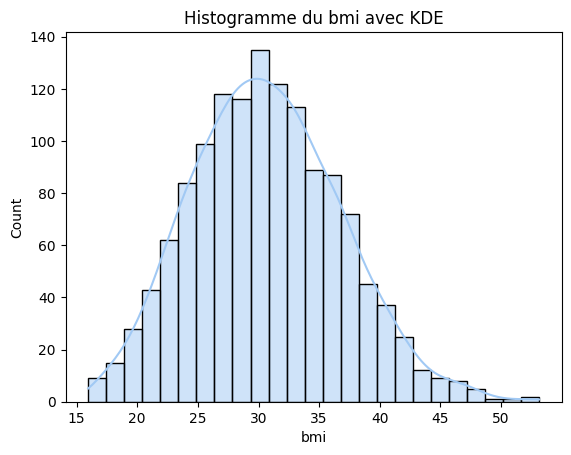

In [90]:
import matplotlib.pyplot as plt
sns.histplot(data['bmi'], kde=True,)

plt.title("Histogramme du bmi avec KDE")


Est-ce qu’il y a des valeurs aberrantes ?

Axes(0.125,0.11;0.775x0.77)
Valeurs aberrantes: 116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


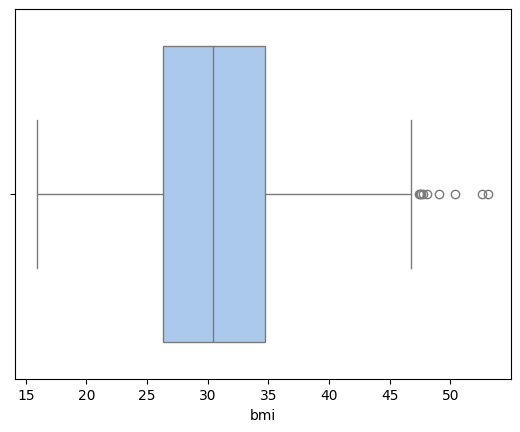

In [76]:
data_zscore_bmi = data['bmi']

# Calcul des Z-scores
z_scores = np.abs(stats.zscore(data_zscore_bmi))

# Seuil pour identifier les valeurs aberrantes
threshold = 3

# Détermination des valeurs aberrantes
outliers = data_zscore_bmi[z_scores > threshold]
outliers_sorted = outliers.sort_values()

print(sns.boxplot(x =data_zscore_bmi,))
print("Valeurs aberrantes:", outliers_sorted)

 faire une Analyse univariée de chaque variable

Text(0.5, 1.0, 'Distribution par Région')

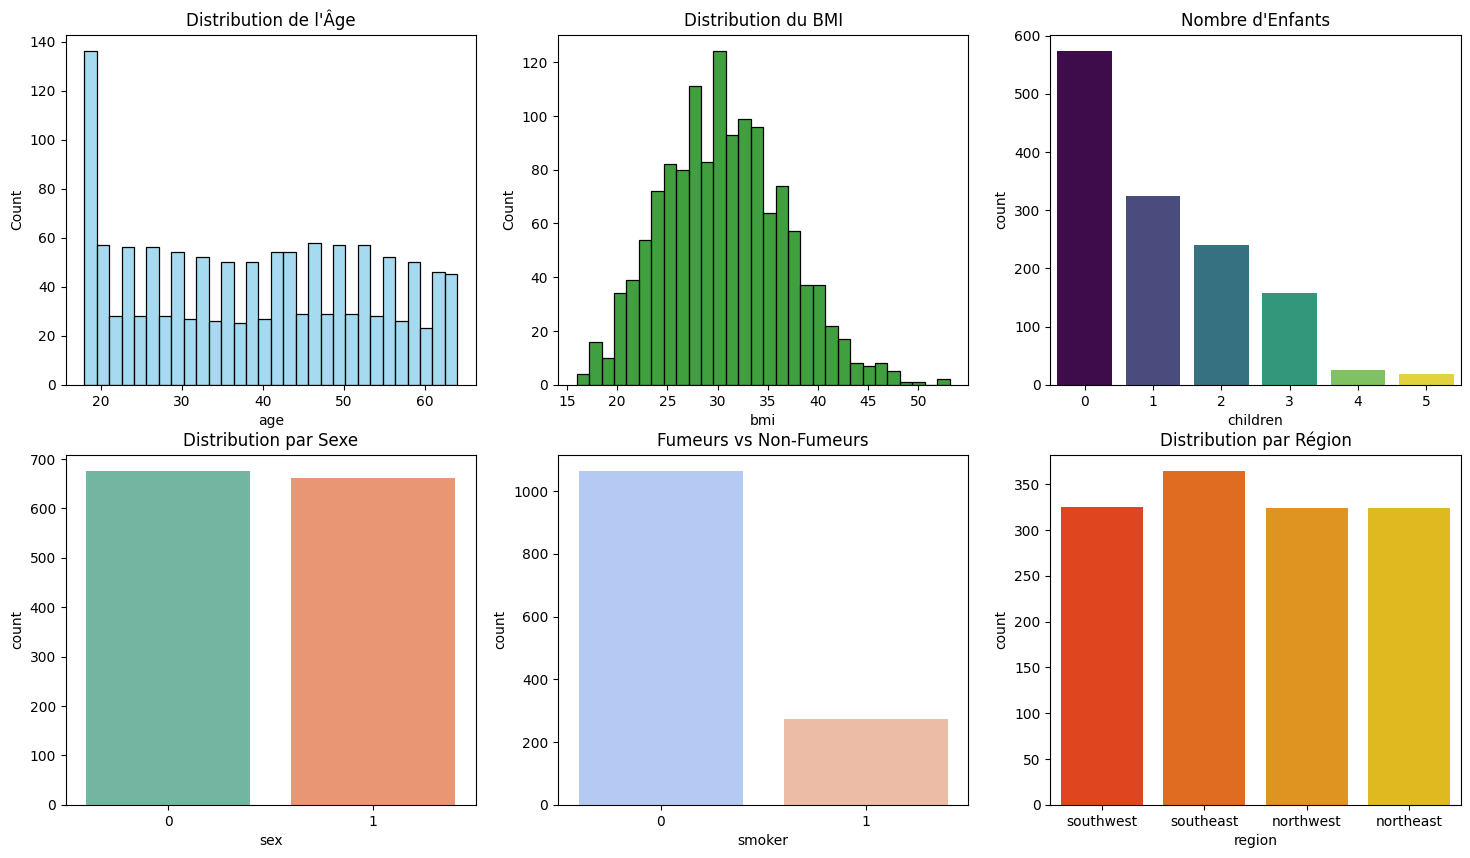

In [99]:
# Analyse univariée de chaque variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Distribution de l'âge
sns.histplot(data['age'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution de l\'Âge')

# Distribution du BMI
sns.histplot(data['bmi'], bins=30, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution du BMI')

# Distribution du Nombre d'Enfants
sns.countplot(x='children', data=data, hue='children', ax=axes[0, 2], palette='viridis', legend=False)
axes[0, 2].set_title('Nombre d\'Enfants')

# Distribution par Sexe
sns.countplot(x='sex', data=data, hue='sex', ax=axes[1, 0], palette='Set2', legend=False)
axes[1, 0].set_title('Distribution par Sexe')

# Distribution Fumeurs / Non-Fumeurs
sns.countplot(x='smoker', data=data, hue='smoker', ax=axes[1, 1], palette='coolwarm', legend=False)
axes[1, 1].set_title('Fumeurs vs Non-Fumeurs')

# Distribution par Région
sns.countplot(x='region', data=data, hue='region', ax=axes[1, 2], palette='autumn', legend=False)
axes[1, 2].set_title('Distribution par Région')



